In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [2]:
df = pd.read_excel("premiums_young.xlsx")
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857


In [3]:
df.shape

(20096, 13)

In [4]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [5]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267
std,2.294052,0.940713,23.420493,2749.906347
min,18.000000,-3.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.250000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


In [10]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1], dtype=int64)

In [11]:
df['number_of_dependants'] = df['number_of_dependants'].abs()

df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267
std,2.294052,0.937200,23.420493,2749.906347
min,18.000000,0.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.250000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


In [12]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns 

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

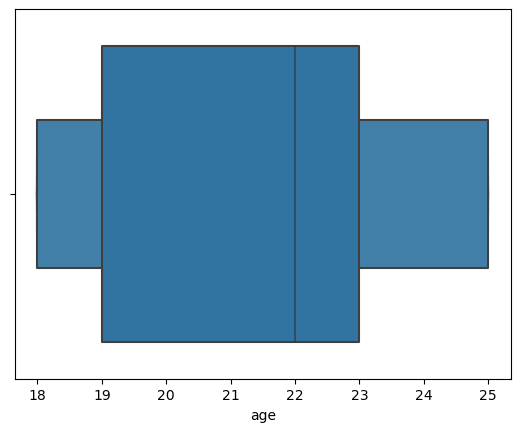

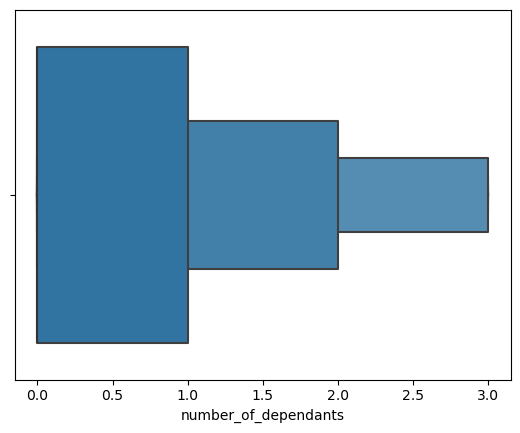

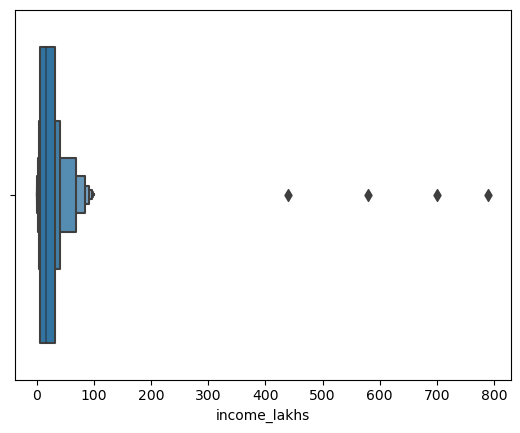

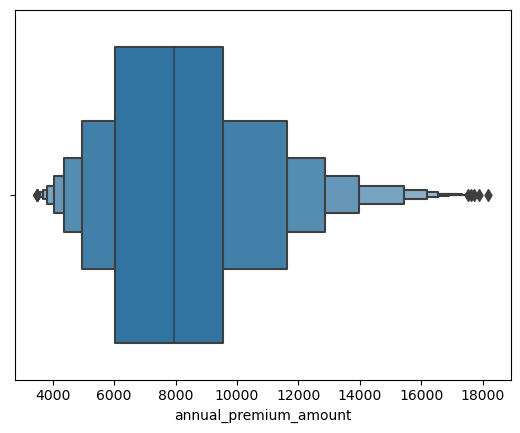

In [13]:
for col in numeric_columns:
    sns.boxenplot(x=df[col])
    plt.show()

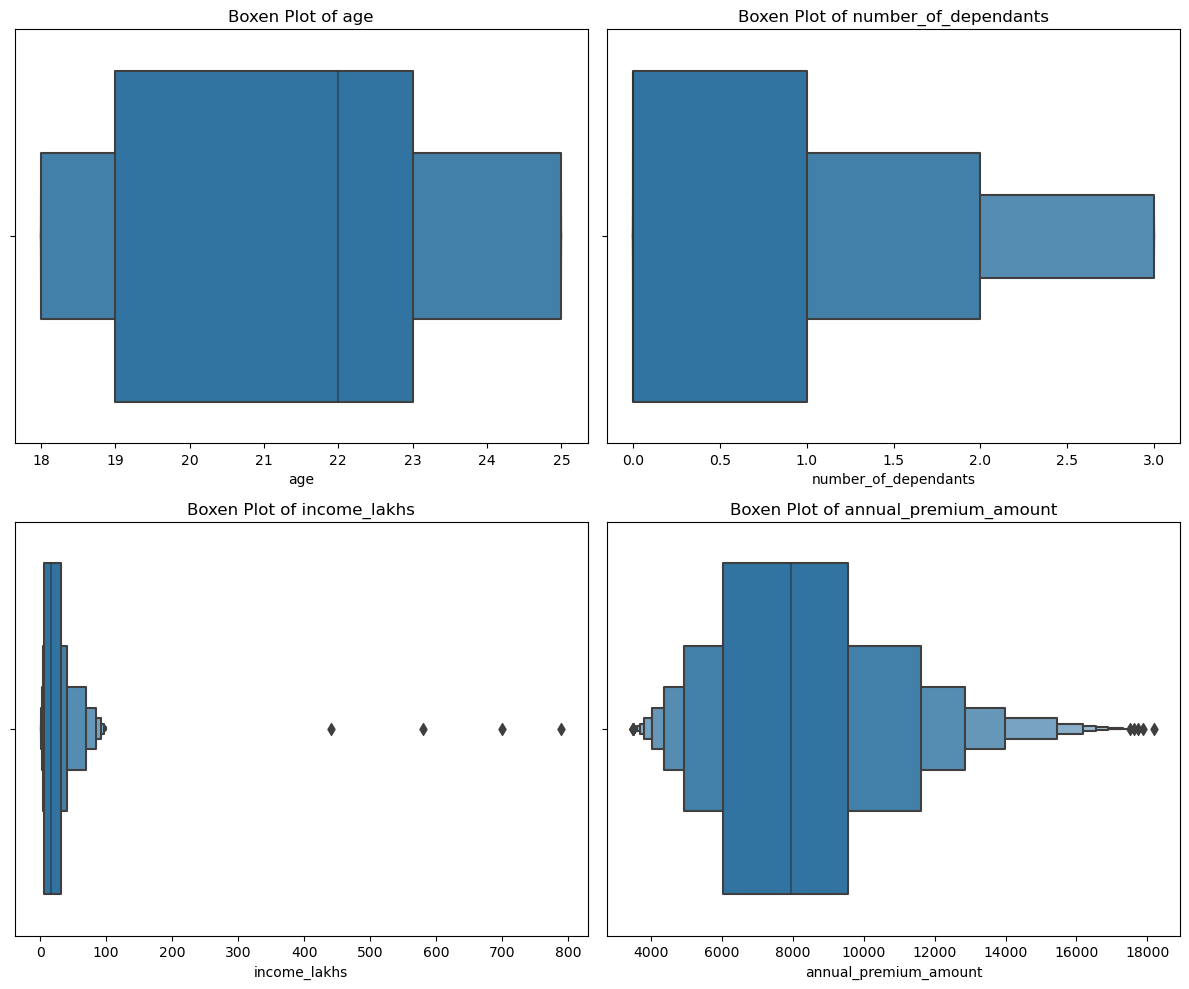

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjust the size as necessary

# Flatten the axes array for easy indexing (axes is a 2D array)
axes = axes.flatten()

# Loop through the numeric columns and plot each boxen plot on the corresponding subplot
for i, col in enumerate(numeric_columns):
    sns.boxenplot(x=df[col], ax=axes[i])  # Plot on the correct subplot axis
    axes[i].set_title(f'Boxen Plot of {col}')  # Set the title for each subplot

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show all plots at once
plt.show()

In [15]:
df[df['age']>100]['age'].unique()

array([], dtype=int64)

In [16]:
df1=df[df.age<=100]
df1.age.describe()

count    20090.000000
mean        21.494375
std          2.294052
min         18.000000
25%         19.000000
50%         22.000000
75%         23.000000
max         25.000000
Name: age, dtype: float64

In [17]:
def get_iqr_bounds(col):
    Q1, Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return lower_bound, upper_bound
lower, upper = get_iqr_bounds(df1['income_lakhs'])
lower, upper

(-31.5, 68.5)

In [18]:
df1[df1.income_lakhs>upper].shape

(1295, 13)

In [19]:
quantile_thresold = df1.income_lakhs.quantile(0.999)
quantile_thresold

100.0

In [20]:
df1[df1.income_lakhs>quantile_thresold].shape

(4, 13)

In [21]:
df2 = df1[df1.income_lakhs<quantile_thresold].copy()
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,18,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,91,No Disease,Gold,11603
20092,23,Female,Northwest,Unmarried,0,Obesity,Occasional,Freelancer,> 40L,57,Diabetes,Gold,14498
20093,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111
20094,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564


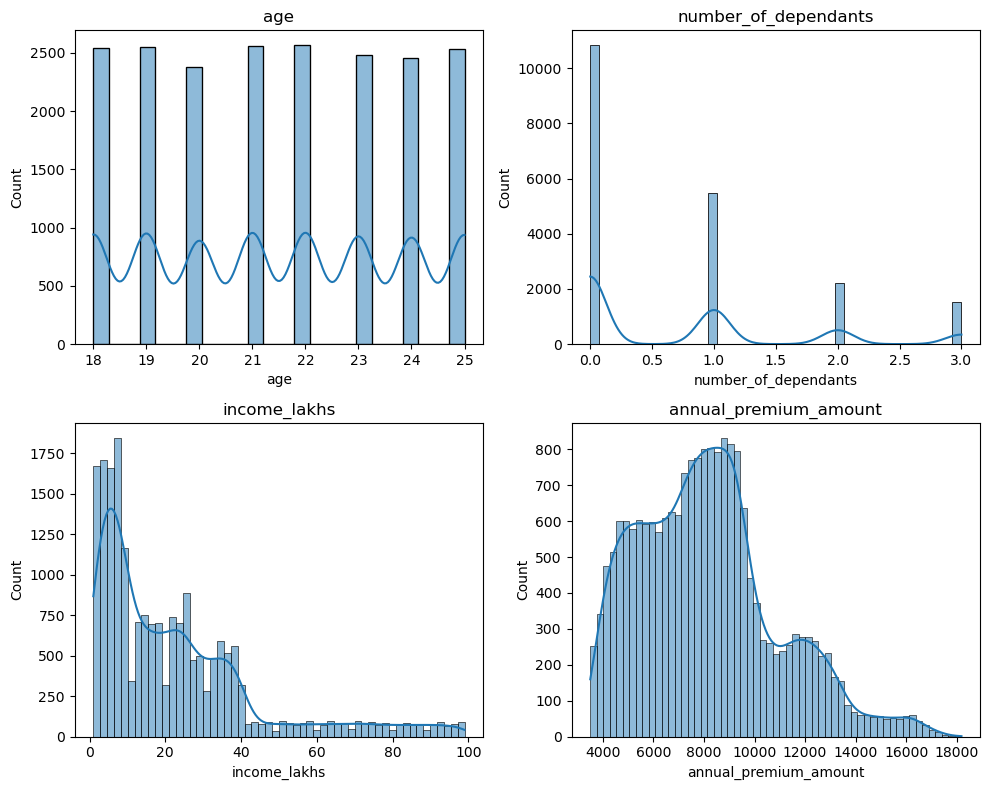

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  # Adjust the size as necessary

for i, column in enumerate(numeric_columns):
    ax = axs[i//2, i%2]  # Determines the position of the subplot in the grid
    sns.histplot(df2[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

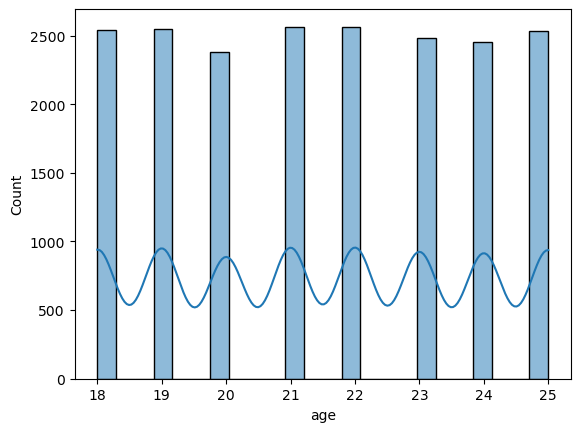

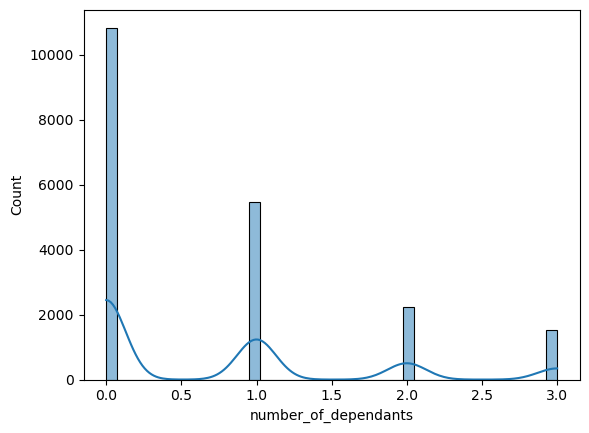

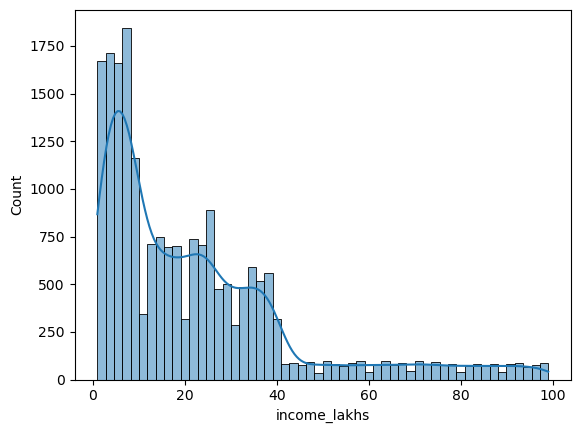

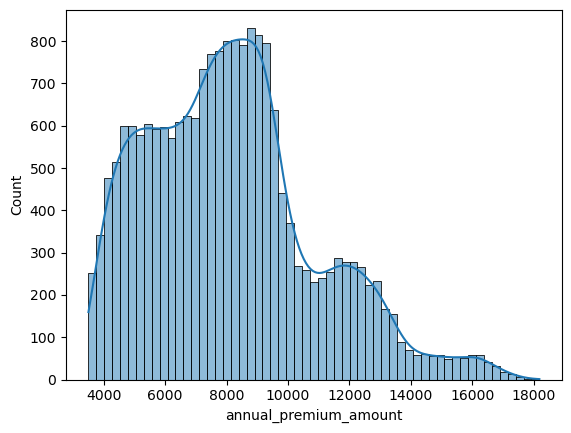

In [23]:
for col in numeric_columns:
    sns.histplot(df2[col], kde=True)
    plt.show()

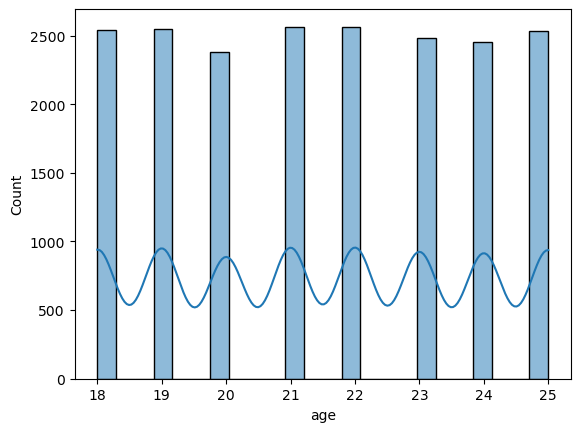

In [24]:
sns.histplot(df2['age'], kde=True)
plt.show()

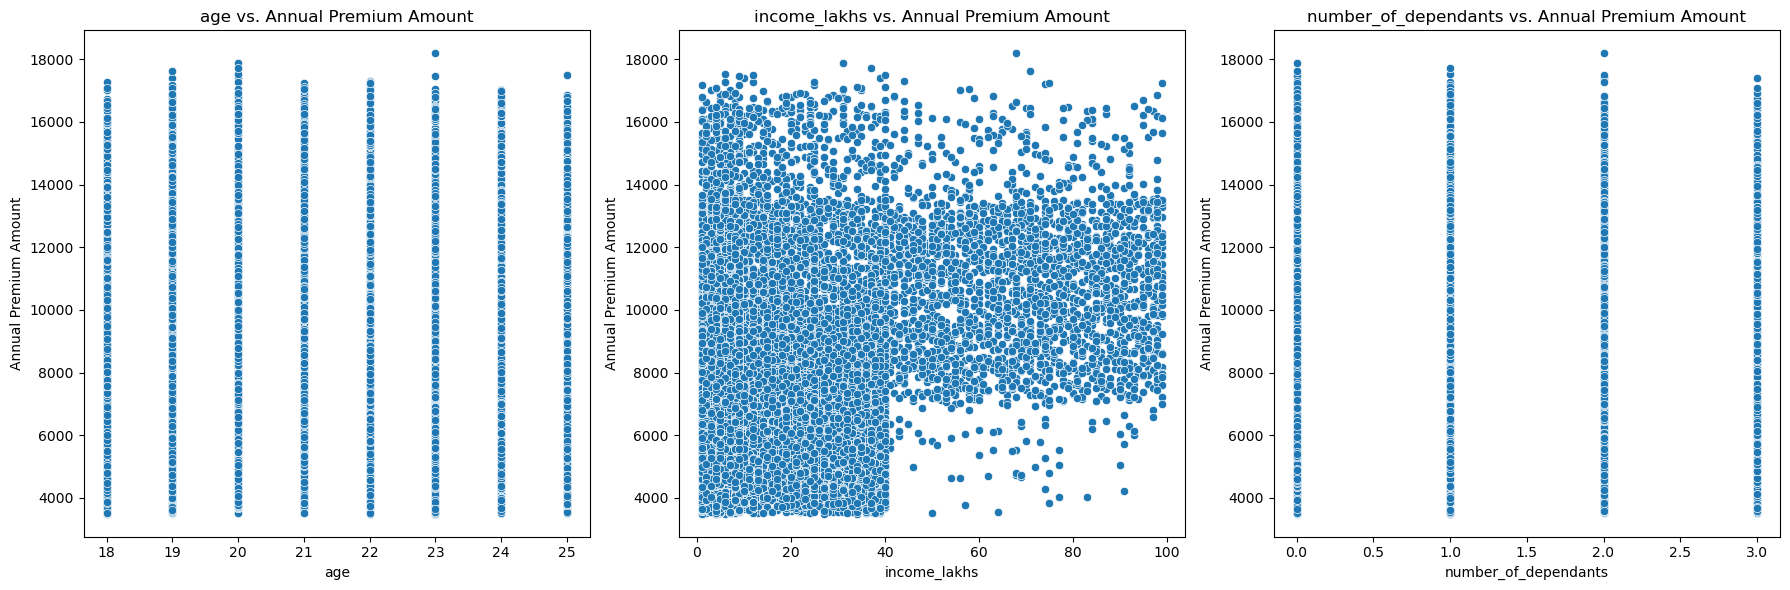

In [25]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

<AxesSubplot:xlabel='age', ylabel='annual_premium_amount'>

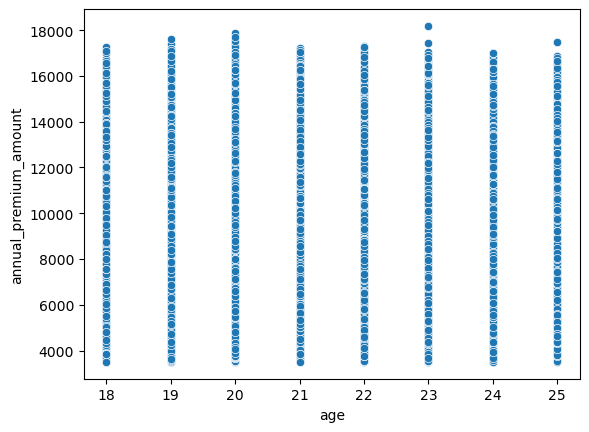

In [26]:
sns.scatterplot(data=df2, x='age', y='annual_premium_amount')

<AxesSubplot:xlabel='age', ylabel='income_lakhs'>

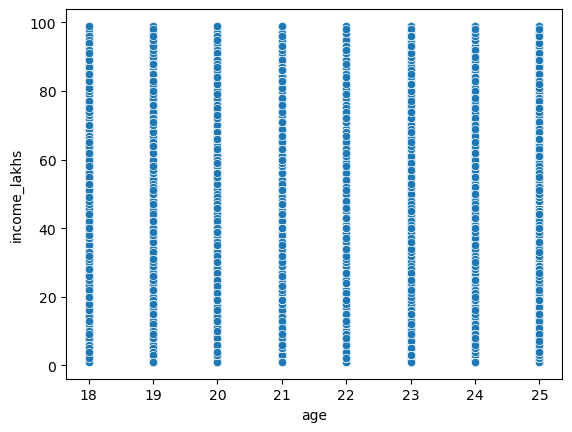

In [27]:
sns.scatterplot(data=df2, x='age', y='income_lakhs')

In [28]:
df2.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [29]:
categorical_cols= ['gender','region','marital_status','bmi_category','smoking_status','employment_status','medical_history','medical_history','insurance_plan']
for col in categorical_cols:
    print(col, ':', df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [30]:
df2['smoking_status'].replace({'Smoking=0':'No Smoking','Does Not Smoke':'No Smoking',
                              'Not Smoking':'No Smoking'},
                               inplace=True)
df2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [31]:
pct_count=df2['gender'].value_counts(normalize=True)
pct_count

Male      0.550364
Female    0.449636
Name: gender, dtype: float64

In [32]:
pct_count.values

array([0.55036402, 0.44963598])

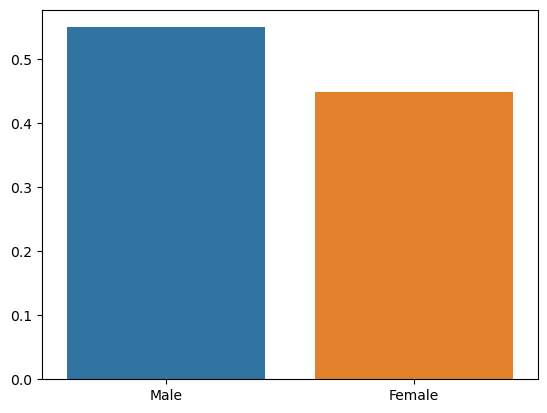

In [33]:
sns.barplot(x=pct_count.index, y=pct_count.values)
plt.show()

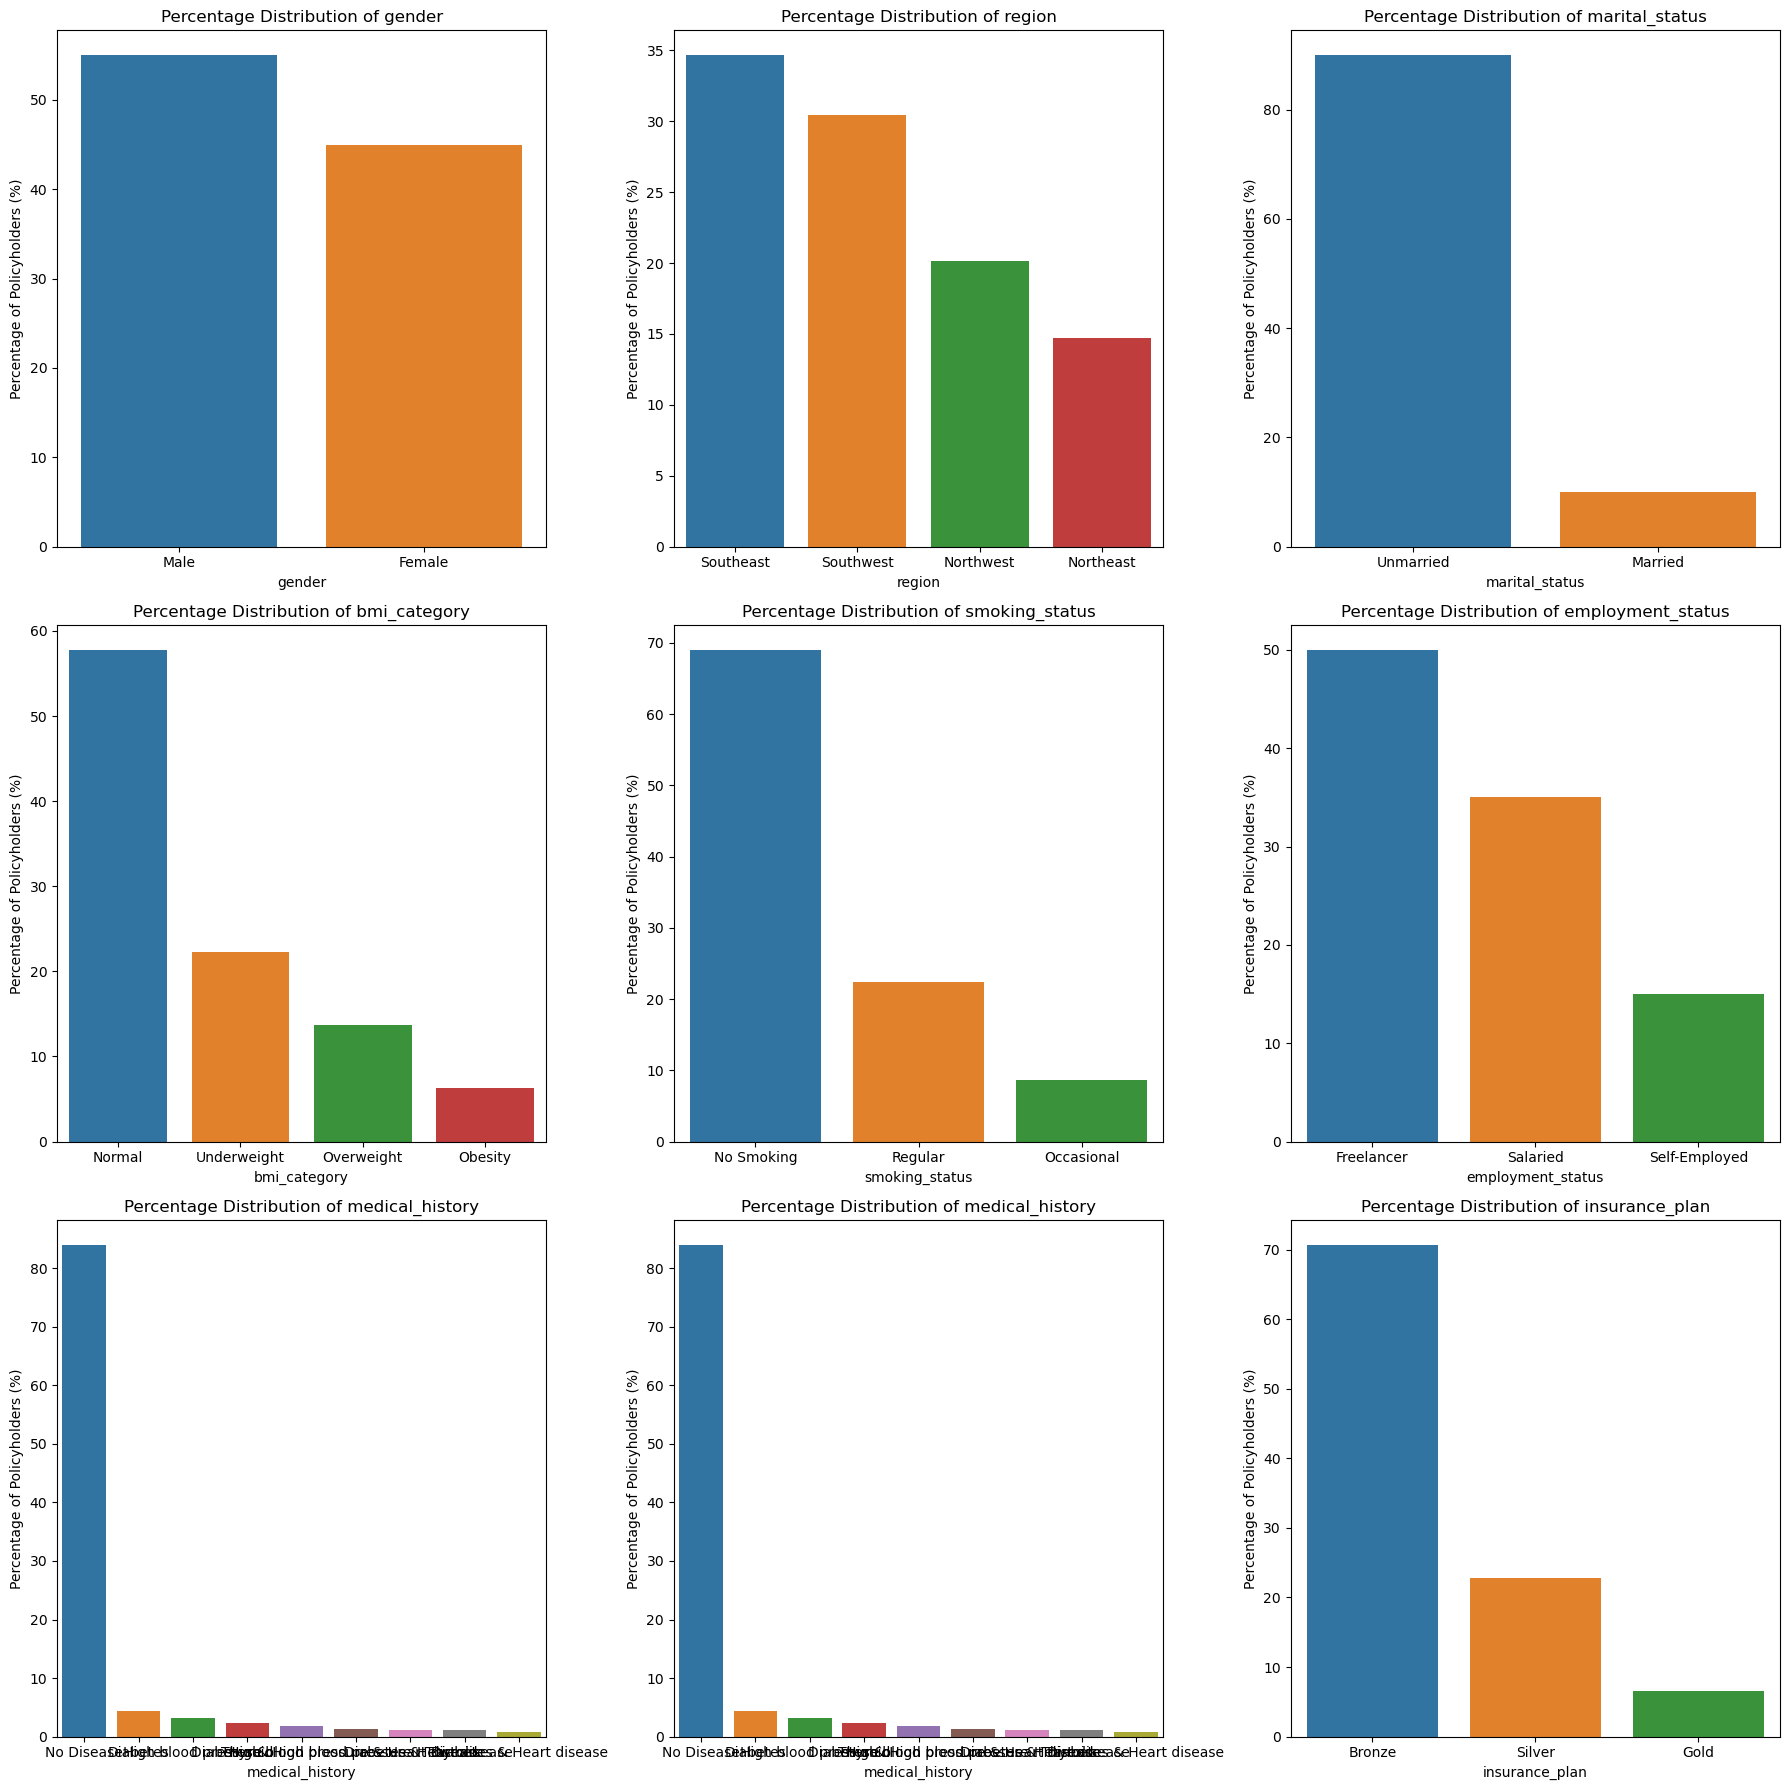

In [34]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, categorical_cols):
    # Calculate the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

In [35]:
cross_tab=pd.crosstab(df2['income_level'], df2['insurance_plan'])
cross_tab


insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4508,326,828
25L - 40L,3382,209,608
<10L,6172,404,1145
> 40L,115,362,1995


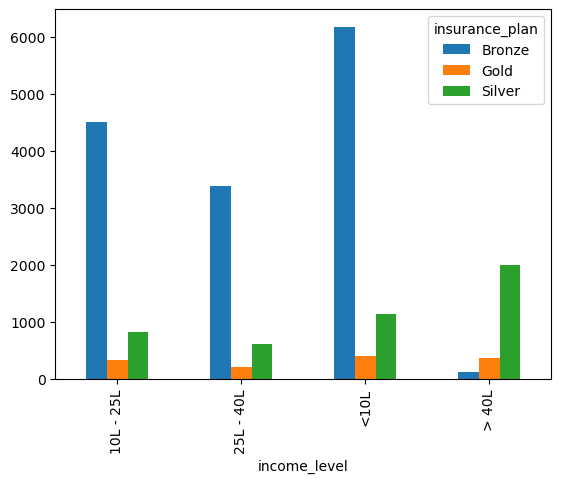

In [36]:
cross_tab.plot(kind="bar")
plt.show()

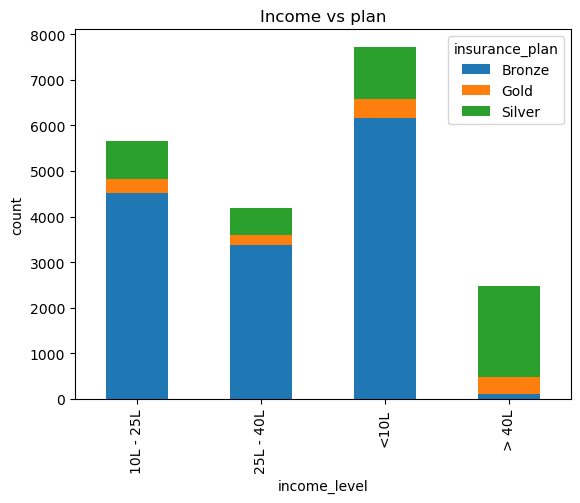

In [37]:
cross_tab.plot(kind="bar",stacked=True)
plt.title('Income vs plan')
plt.ylabel('count')
plt.show()

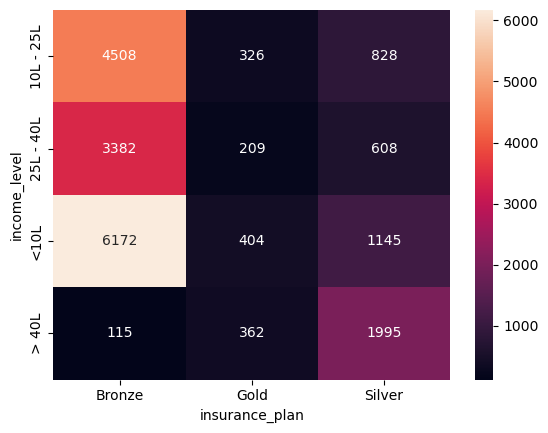

In [38]:
sns.heatmap(cross_tab, annot=True,fmt='d')
plt.show()


In [39]:
 df.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050


In [40]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [41]:
risk_scores = {  "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0}


In [42]:
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,no disease,none,0,0.000000


In [43]:
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [44]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})

In [45]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

In [46]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,2,15,No Disease,1,5684,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,2,14,No Disease,1,5712,no disease,none,0,0.000000


In [47]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,high blood pressure,none,6,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,no disease,none,0,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,no disease,none,0,...,1,0,1,0,0,0,0,1,1,0


In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20054 entries, 0 to 20095
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              20054 non-null  int64  
 1   number_of_dependants             20054 non-null  int64  
 2   income_level                     20054 non-null  int64  
 3   income_lakhs                     20054 non-null  int64  
 4   medical_history                  20054 non-null  object 
 5   insurance_plan                   20054 non-null  int64  
 6   annual_premium_amount            20054 non-null  int64  
 7   disease1                         20054 non-null  object 
 8   disease2                         20054 non-null  object 
 9   total_risk_score                 20054 non-null  int64  
 10  normalized_risk_score            20054 non-null  float64
 11  gender_Male                      20054 non-null  int32  
 12  region_Northwest  

In [49]:
df4 = df3.drop(['medical_history','disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head(3)  

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,0.000000,0,0,1,0,1,0,0,0,0,1,1,0


In [50]:
df4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'normalized_risk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

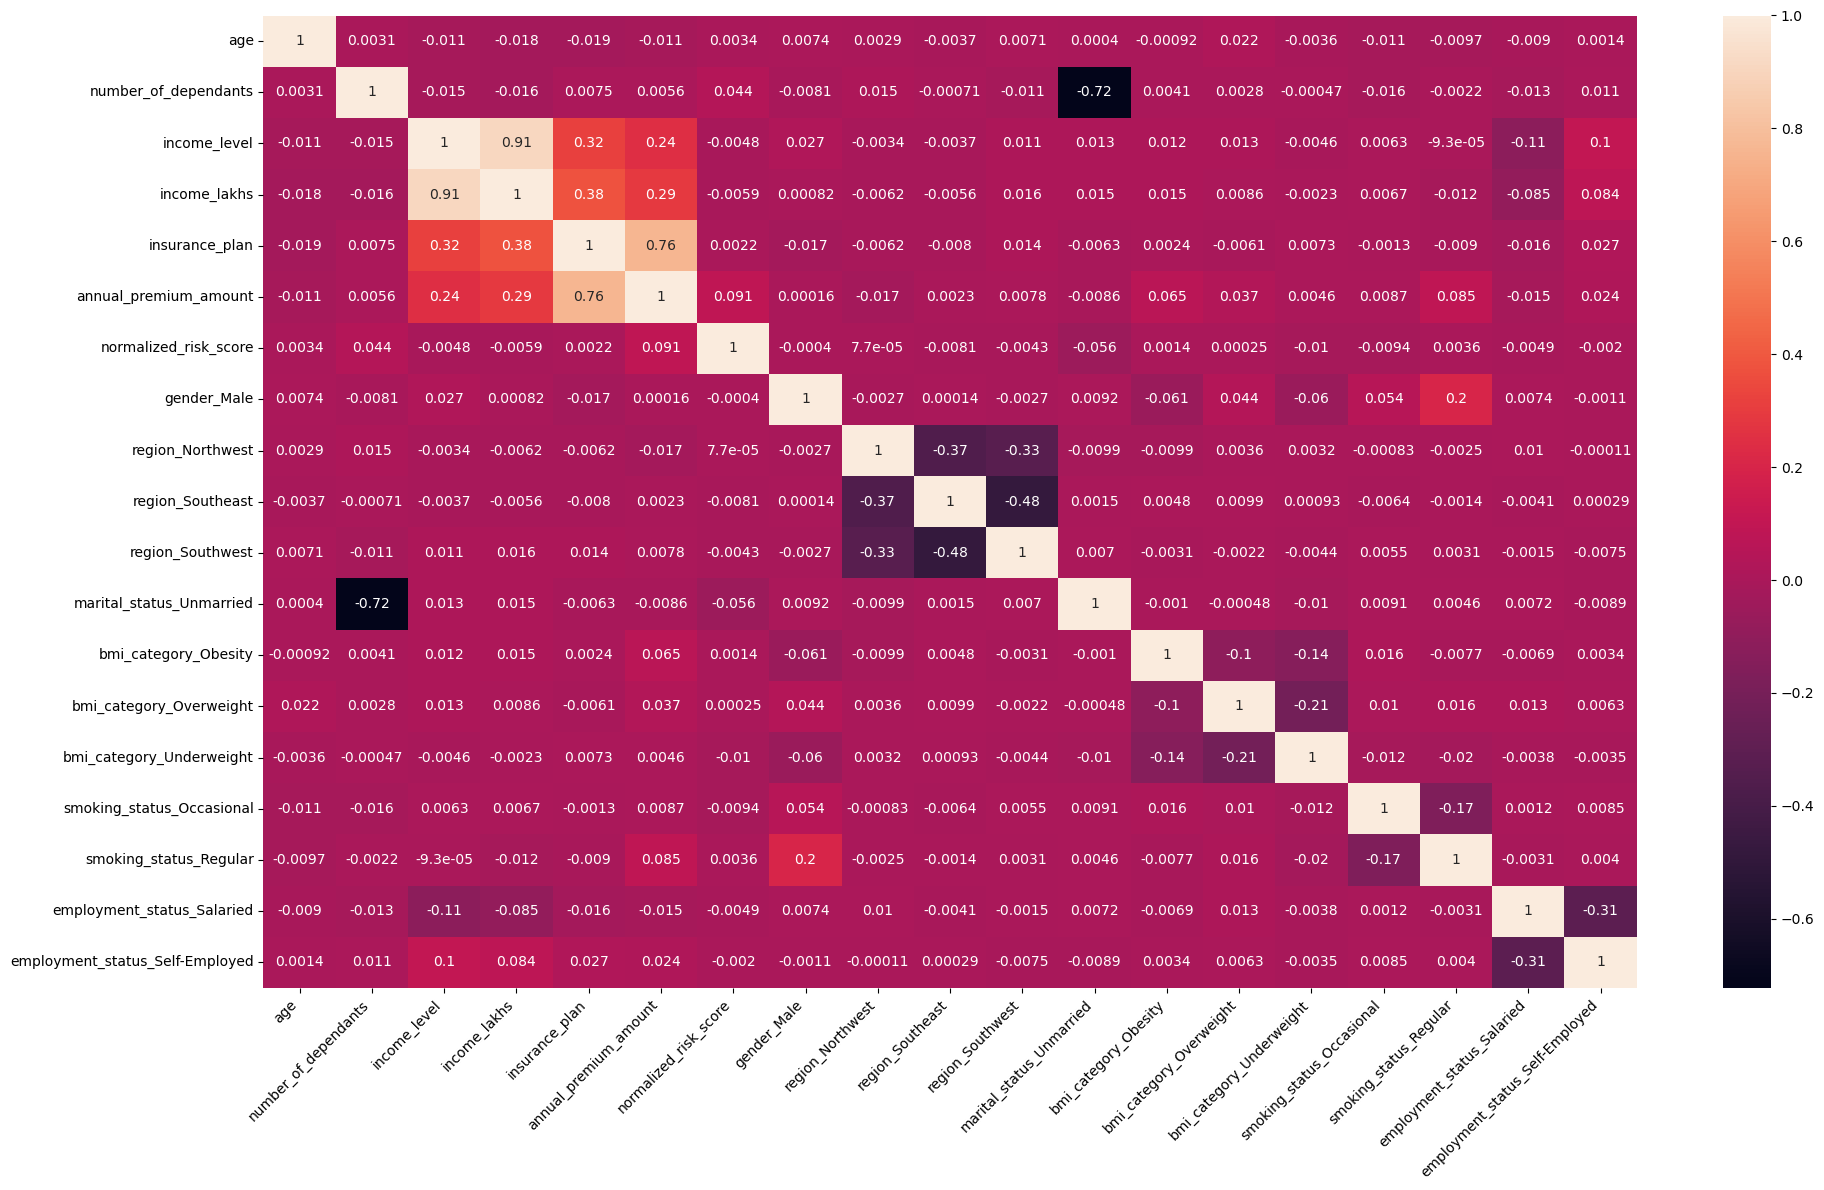

In [51]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [52]:
df4.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,0.000000,0,1,0,0,1,0,0,1,0,0,0,0


In [53]:
X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000
mean,0.499145,0.240816,0.356970,0.217005,0.178967,0.092130,0.550364,0.201306,0.346863,0.304578,0.899920,0.063528,0.136531,0.222300,0.086417,0.223497,0.350155,0.149945
std,0.327769,0.312344,0.346809,0.219663,0.299827,0.230059,0.497469,0.400987,0.475984,0.460240,0.300114,0.243917,0.343360,0.415802,0.280985,0.416599,0.477030,0.357027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.051020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.428571,0.000000,0.333333,0.153061,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.306122,0.500000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [55]:
calculate_vif(X)

,Column,VIF
0,age,3.142125
1,number_of_dependants,1.860137
2,income_level,12.076228
3,income_lakhs,12.064125
4,insurance_plan,1.586966
5,normalized_risk_score,1.154327
6,gender_Male,2.309901
7,region_Northwest,2.147121
8,region_Southeast,2.968665
9,region_Southwest,2.730084


In [56]:
calculate_vif(X.drop('income_level', axis = 'columns'))

,Column,VIF
0,age,3.140709
1,number_of_dependants,1.857617
2,income_lakhs,2.293723
3,insurance_plan,1.581668
4,normalized_risk_score,1.154291
5,gender_Male,2.299671
6,region_Northwest,2.146229
7,region_Southeast,2.967484
8,region_Southwest,2.729448
9,marital_status_Unmarried,7.305480


In [57]:
X_reduced=X.drop('income_level', axis='columns')
X_reduced

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,1.000000,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020408,0.5,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.979592,0.5,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.142857,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.132653,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,0.000000,0.000000,0.918367,1.0,0.000000,0,0,1,0,1,0,0,1,0,0,0,0
20092,0.714286,0.000000,0.571429,1.0,0.428571,0,1,0,0,1,1,0,0,1,0,0,0
20093,0.857143,0.000000,0.346939,0.0,0.000000,0,1,0,0,1,0,0,1,0,0,0,1
20094,0.428571,0.000000,0.316327,0.0,0.000000,1,1,0,0,1,0,0,0,0,1,0,0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (14037, 17)
x test:  (6017, 17)
y train:  (14037,)
y test:  (6017,)


In [59]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
train_score = model_lr.score(X_train, y_train)
train_score, test_score

(0.6048350981759057, 0.5964252843262741)

In [60]:
model_lr.coef_

array([ 7.26389744e+01, -1.51679170e+01,  6.04888843e+00,  7.00382876e+03,
        1.03703478e+03, -3.14881122e+01, -8.95715718e+01,  9.05237749e+00,
       -5.03905309e+01, -3.11130924e+01,  7.50869774e+02,  4.32893765e+02,
        1.04140913e+02,  3.03204022e+02,  6.60132731e+02, -2.57407237e+01,
        1.56223624e+01])

In [61]:
model_lr.intercept_

6542.521635489462

In [62]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  3064132.2881470574 RMSE:  1750.4663059159573


In [63]:
X_test.shape

(6017, 17)

In [64]:
y_test.shape

(6017,)

In [65]:
X_train.shape

(14037, 17)

In [66]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([  72.638974,  -15.167917,    6.048888, 7003.828759, 1037.034779,
        -31.488112,  -89.571572,    9.052377,  -50.390531,  -31.113092,
        750.869774,  432.893765,  104.140913,  303.204022,  660.132731,
        -25.740724,   15.622362])

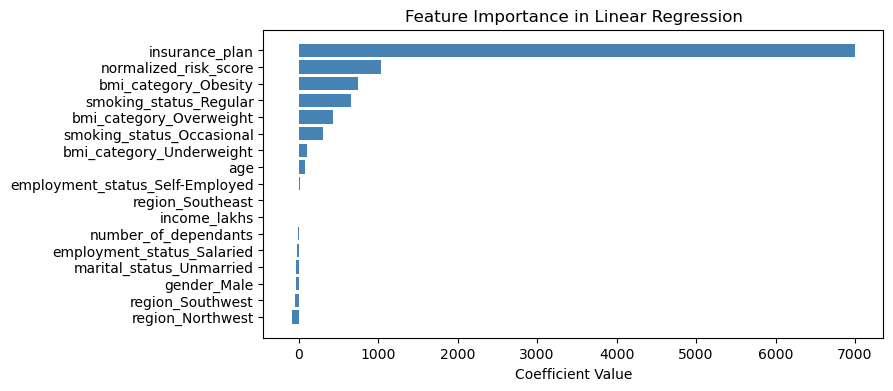

In [67]:
feature_importance = model_lr.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [68]:
model_rg = Ridge(alpha=1)
model_rg.fit(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
train_score = model_rg.score(X_train, y_train)
train_score, test_score

(0.6048346412141937, 0.5964335620224849)

In [69]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
test_score = model_xgb.score(X_test, y_test)
train_score = model_xgb.score(X_train, y_train)
train_score, test_score

(0.727490451008497, 0.5569512270247807)

In [70]:
y_pred = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBOOST Regression ==> MSE: ", mse_xgb, "RMSE: ", rmse_xgb)

XGBOOST Regression ==> MSE:  3363838.213281027 RMSE:  1834.0769376667456


In [71]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.6018239672149338

In [72]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}

In [73]:
best_model = random_search.best_estimator_

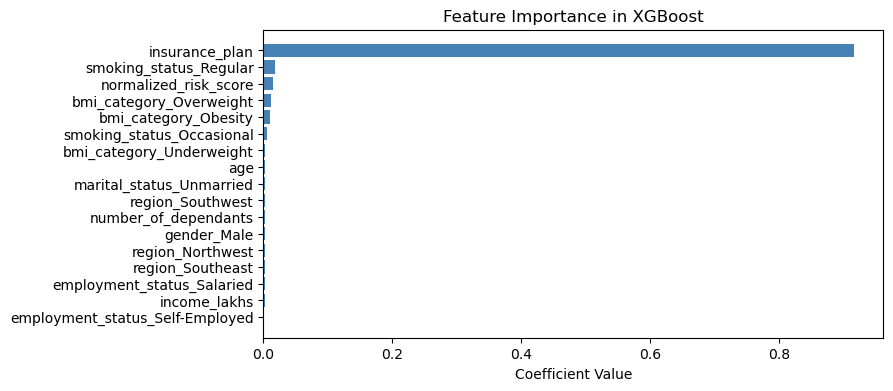

In [74]:
feature_importance = best_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

### error analysis

In [75]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
1710,4096,6981.050781,2885.050781,70.435810
11963,4503,6981.050781,2478.050781,55.031108
8719,8332,10772.823242,2440.823242,29.294566
7208,11578,10084.492188,-1493.507812,-12.899532
9416,7045,6570.482422,-474.517578,-6.735523


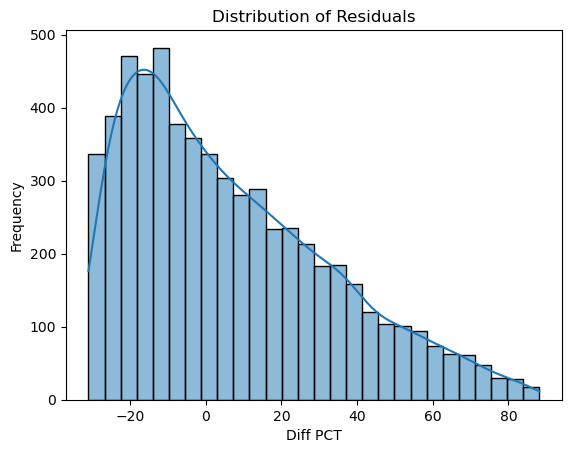

In [76]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [77]:
results_df[np.abs(results_df.diff_pct)>10]

,actual,predicted,diff,diff_pct
1710,4096,6981.050781,2885.050781,70.435810
11963,4503,6981.050781,2478.050781,55.031108
8719,8332,10772.823242,2440.823242,29.294566
7208,11578,10084.492188,-1493.507812,-12.899532
15637,5708,6562.778320,854.778320,14.975093
...,...,...,...,...
3065,7958,6562.778320,-1395.221680,-17.532316
2154,9986,7484.014648,-2501.985352,-25.054930
18574,3606,6618.695312,3012.695312,83.546736
17354,7321,6570.482422,-750.517578,-10.251572


In [78]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
1710,4096,6981.050781,2885.050781,70.435810
11963,4503,6981.050781,2478.050781,55.031108
8719,8332,10772.823242,2440.823242,29.294566
7208,11578,10084.492188,-1493.507812,-12.899532
15637,5708,6562.778320,854.778320,14.975093


In [79]:
extreme_results_df.shape

(4427, 4)

In [80]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

73.57487119827157

In [81]:
results_df[np.abs(results_df.diff_pct)>50]

,actual,predicted,diff,diff_pct
1710,4096,6981.050781,2885.050781,70.435810
11963,4503,6981.050781,2478.050781,55.031108
15751,4593,6981.050781,2388.050781,51.993268
16,4286,6611.990234,2325.990234,54.269488
10357,4668,7464.903809,2796.903809,59.916534
...,...,...,...,...
1196,4016,6595.966309,2579.966309,64.242189
16023,4577,7386.718750,2809.718750,61.387781
20068,4373,6927.104004,2554.104004,58.406220
18574,3606,6618.695312,3012.695312,83.546736


In [82]:
extreme_results_df[abs(extreme_results_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,predicted,diff,diff_pct
10165,3501,6588.262207,3087.262207,88.182297
14598,3501,6588.262207,3087.262207,88.182297
18500,3508,6595.966309,3087.966309,88.026406
17197,3508,6588.262207,3080.262207,87.806790
4169,3517,6595.966309,3078.966309,87.545246
...,...,...,...,...
4855,4393,6595.966309,2202.966309,50.147196
813,4631,6952.925293,2321.925293,50.138745
18326,4633,6955.566895,2322.566895,50.130950
1597,4653,6981.050781,2328.050781,50.033329


In [83]:
extreme_results_df.index

Int64Index([ 1710, 11963,  8719,  7208, 15637,  6511,  7608,  8942,   395,
            18536,
            ...
            19824, 16023, 18017, 17253, 20068,  3065,  2154, 18574, 17354,
            10020],
           dtype='int64', length=4427)

In [84]:
X_test.index

Int64Index([ 1710, 11963,  8719,  7208,  9416, 15637,  6511, 11179,  7608,
             6396,
            ...
            18017, 17253,  5619, 20068,  3065,  2154, 11201, 18574, 17354,
            10020],
           dtype='int64', length=6017)

In [85]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
1710,0.714286,0.000000,0.040816,0.0,0.000000,0,0,1,0,1,0,1,0,0,0,0,0
11963,1.000000,0.000000,0.051020,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0
8719,0.428571,0.000000,0.061224,0.5,0.000000,1,0,0,0,1,0,0,0,0,1,0,0
7208,0.571429,1.000000,0.265306,0.5,0.000000,0,0,0,1,0,0,0,0,0,0,0,0
15637,0.000000,0.000000,0.244898,0.0,0.000000,1,0,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065,0.142857,0.000000,0.040816,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,1,0
2154,1.000000,0.333333,0.387755,0.0,0.428571,0,0,0,1,1,0,1,0,1,0,0,1
18574,0.714286,0.333333,0.030612,0.0,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
17354,0.428571,0.000000,0.000000,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0


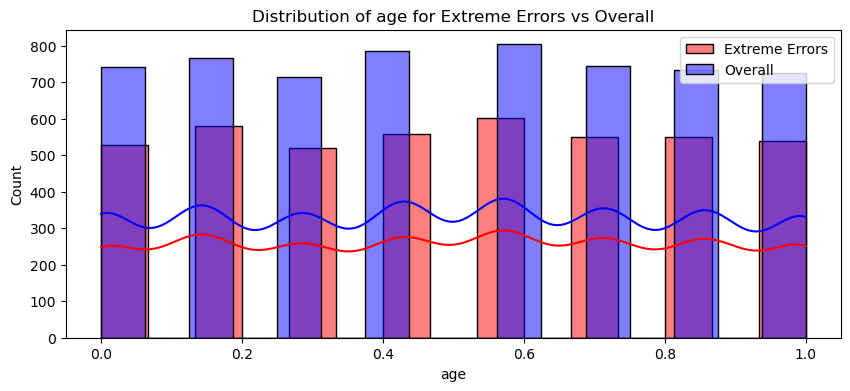

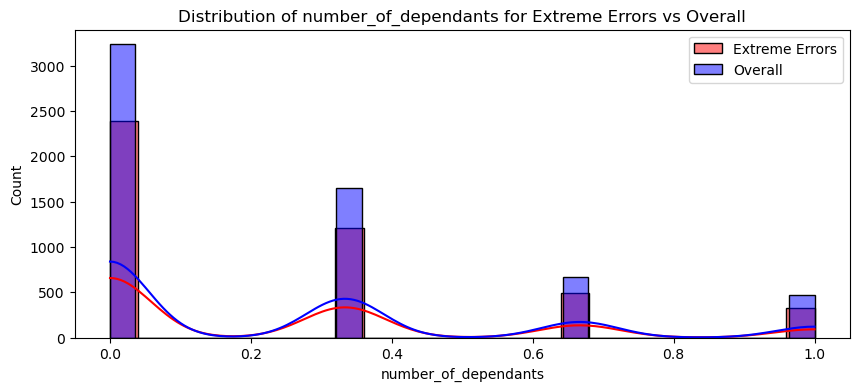

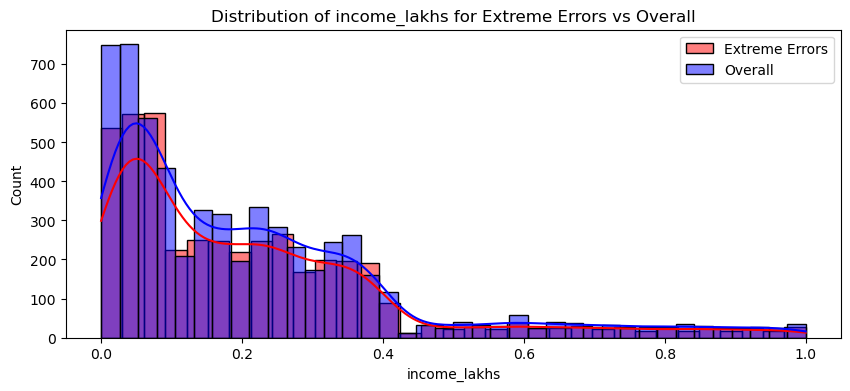

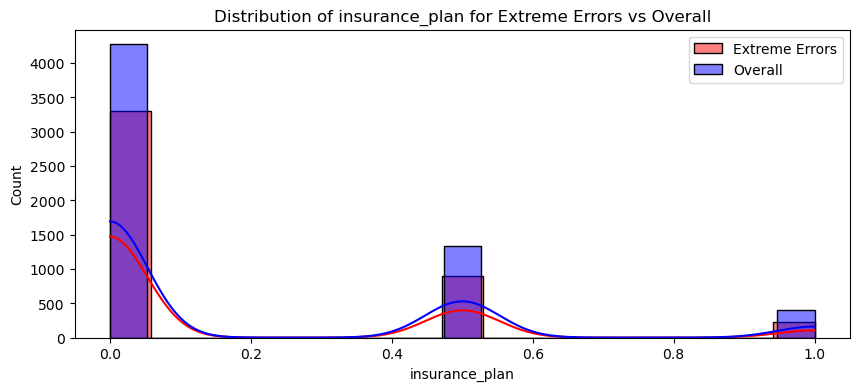

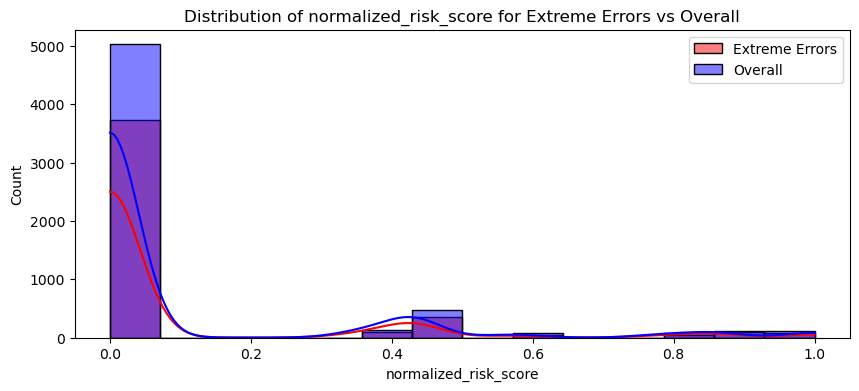

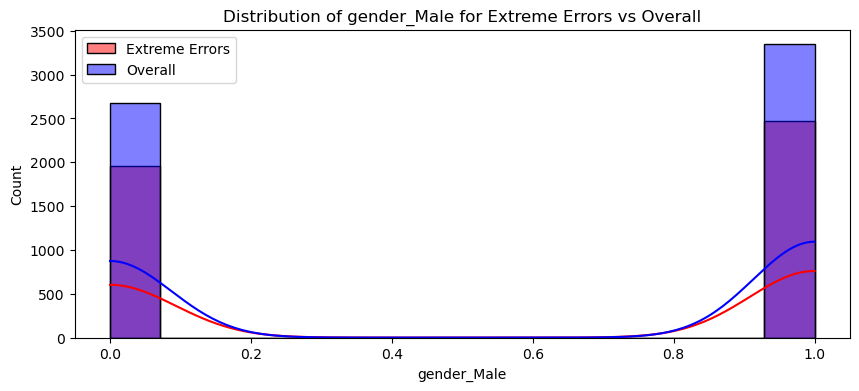

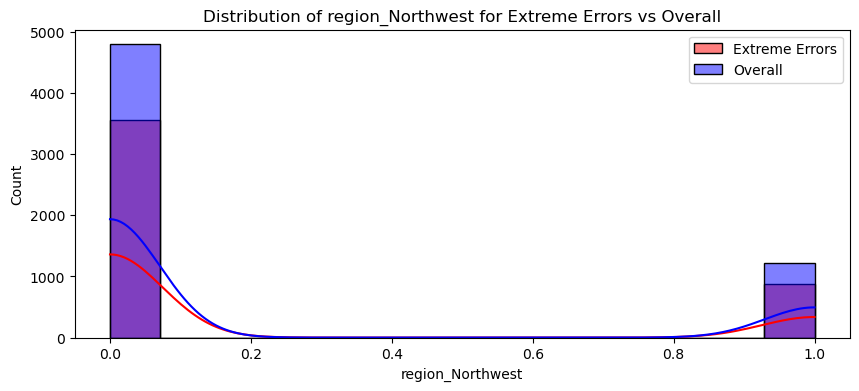

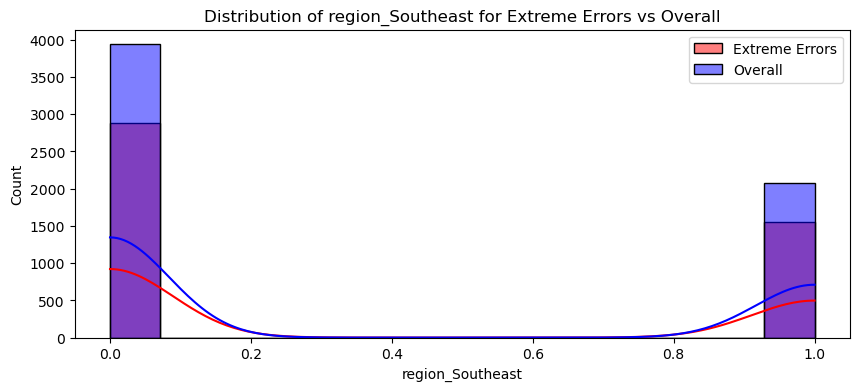

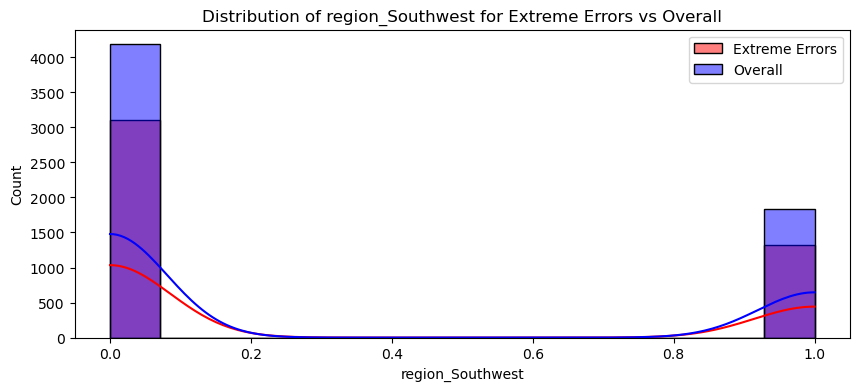

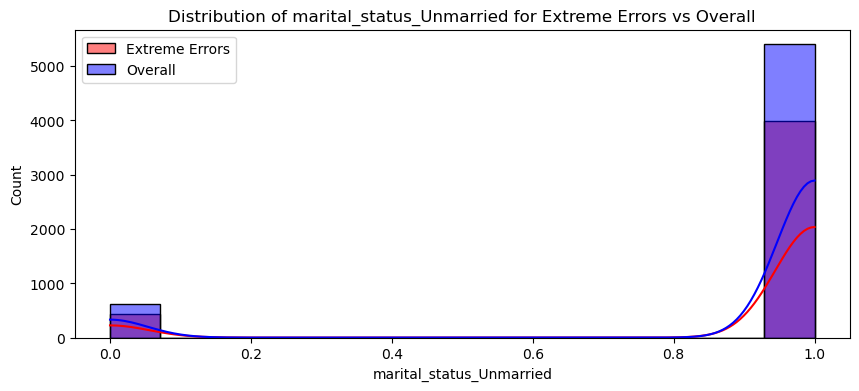

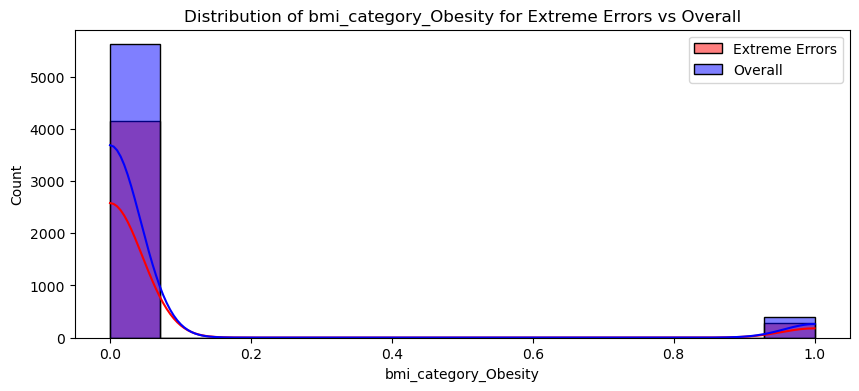

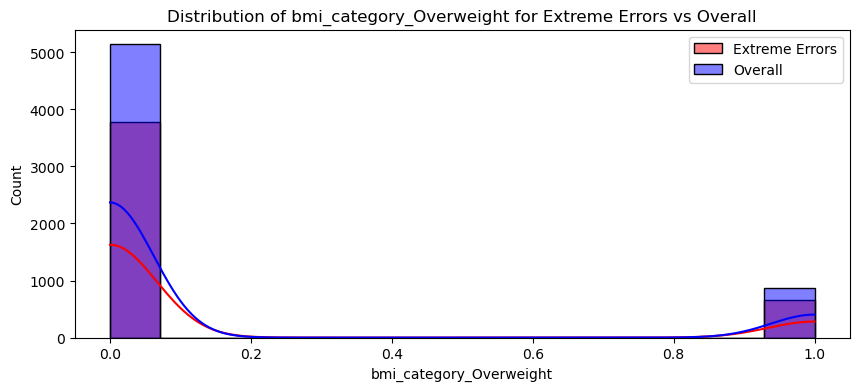

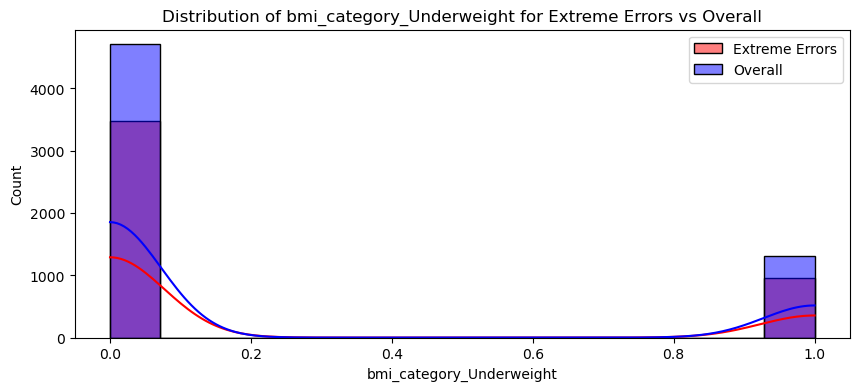

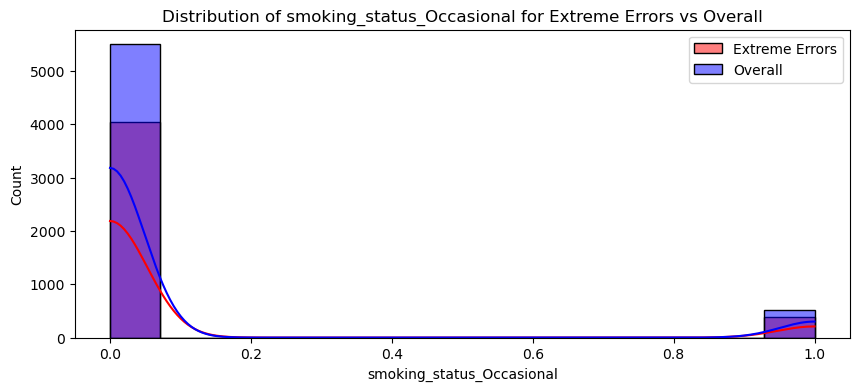

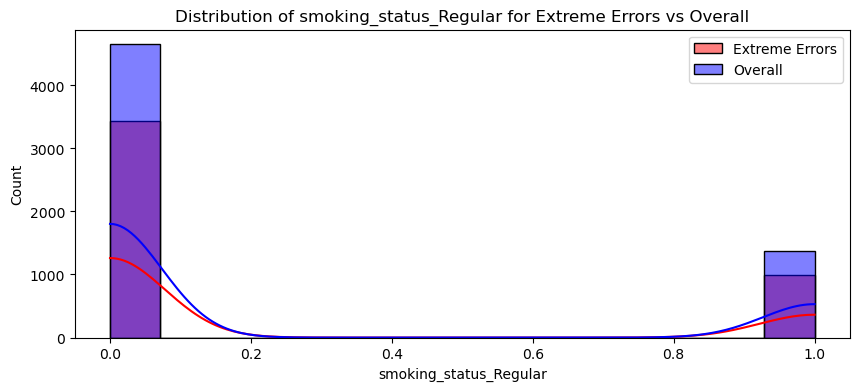

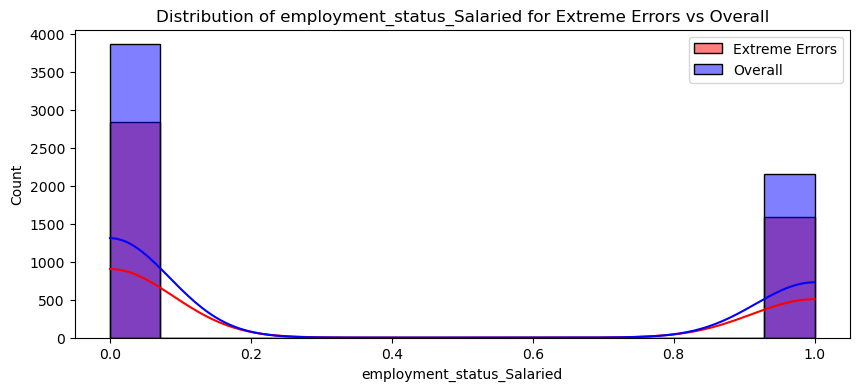

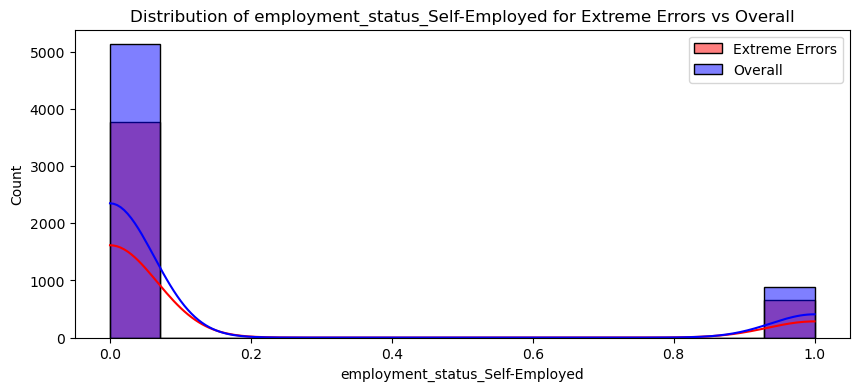

In [86]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

In [87]:
extreme_errors_df['income_level']=-1

In [88]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,23.0,0.0,-2.0,5.0,1.0
1,25.0,0.0,-2.0,6.0,1.0
2,21.0,0.0,-2.0,7.0,2.0
3,22.0,3.0,-2.0,27.0,2.0
4,18.0,0.0,-2.0,25.0,1.0


In [89]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,4427.000000,4427.000000,4427.0,4427.000000,4427.000000
mean,21.507341,0.720578,-2.0,21.719901,1.307206
std,2.271183,0.934037,0.0,20.485006,0.564462
min,18.000000,0.000000,-2.0,1.000000,1.000000
25%,19.000000,0.000000,-2.0,6.000000,1.000000
50%,22.000000,0.000000,-2.0,16.000000,1.000000
75%,23.000000,1.000000,-2.0,31.000000,2.000000
max,25.000000,3.000000,-2.0,99.000000,3.000000


<AxesSubplot:xlabel='age', ylabel='Count'>

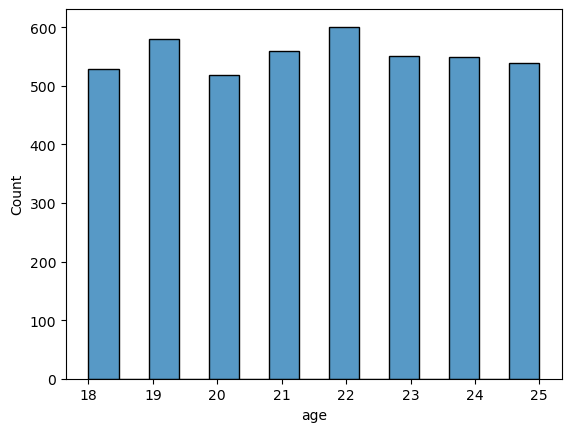

In [90]:
sns.histplot(df_reversed.age)